# Electrostatic Interaction
### Intro
$ E = - \nabla V$

$V = {q \over 4 \pi \epsilon _0 r}$

Two protons interacting.

A) Plot from r = 5 pm to r = 500 pm

B) Electon at r = 140 pm. $F = qE$ find $a$ for the electron. How fast is it travelling? $a = {v^2 \over r}$

C) Redo it but electron and proton. 

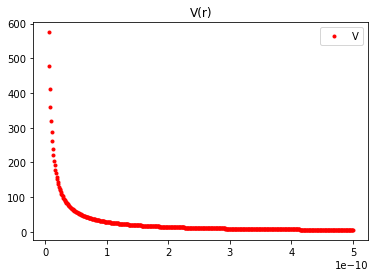

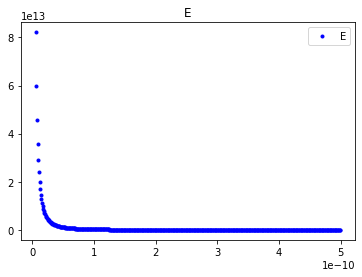

It is traveling 1899518.91 m/s and 0.006c


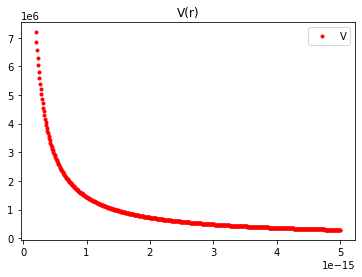

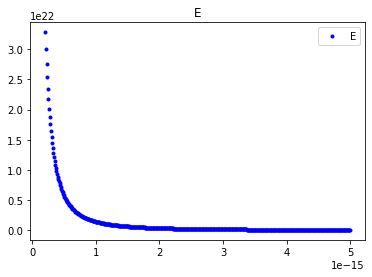

It would need to be traveling 188046661911.08 m/s which is 626.822c


In [2]:
import numpy as np
import matplotlib.pyplot as plt
e = 1.6e-19
q = e*2
ϵ = 8.854187e-12
r,h = np.linspace(5e-12,500e-12,495,retstep=True)
V = q/4/np.pi/ϵ/r
E = -(V[2:]-V[:-2])/2/h
plt.plot(r,V,'r.',label="V")
plt.legend()
plt.title('V(r)')
plt.show()
plt.plot(r[1:-1],E,'b.', label="E")
plt.legend()
plt.title('E')
plt.show()


#Part B
qe = -e
m = 9.11e-31
rH = 140e-12
Vr1 = q/4/np.pi/ϵ/(rH+h)
Vr2 = q/4/np.pi/ϵ/(rH-h)
ErH = -(Vr1-Vr2)/2/h
F = qe*ErH
a = F/m
v = np.sqrt(-a*rH)
print(f'It is traveling {v:.2f} m/s and {v/3e8 :.3f}c')

#Part C
e = 1.6e-19
q = e
ϵ = 8.854187e-12
r,h = np.linspace(.2e-15,5e-15,500,retstep=True)
V = q/4/np.pi/ϵ/r
E = -(V[2:]-V[:-2])/2/h
plt.plot(r,V,'r.',label="V")
plt.legend()
plt.title('V(r)')
plt.show()
plt.plot(r[1:-1],E,'b.', label="E")
plt.legend()
plt.title('E')
plt.show()
qe = -e
m = 9.11e-31
re = 1e-15
Vr1 = q/4/np.pi/ϵ/(re+h)
Vr2 = q/4/np.pi/ϵ/(re-h)
ErE = -(Vr1-Vr2)/2/h
F = qe*ErE
a = F/m
v = np.sqrt(-a*rH)
print(f'It would need to be traveling {v:.2f} m/s which is {v/3e8 :.3f}c')


### Conclusion 
This "model" of a neutron is completely false. It would have to be going far beyond what an electron could move. 

# Exercise 5.23
### Introduction
$$ v = \nabla [w(x,y) -z]$$
$$ a \dot v = |a| |v| cos \theta$$
See book for definition of I (illumination)

a) download file. Calculate partial derivatives at each point. h = 30000

b) $\phi = 45^\circ$ Calculate intensity and make a density plot. 

c) STM file. Create 3D picture. h = 2.5

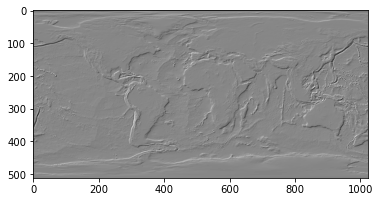

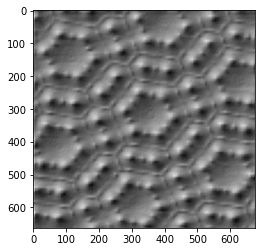

In [4]:
import numpy as np
def intensity(phi,partialx,partialy):
    numerator = np.cos(phi*np.pi/180)*partialx+np.sin(phi*np.pi/180)*partialy
    denominator = np.sqrt(partialx**2 + partialy**2 + 1)
    return numerator/denominator


data = np.loadtxt('http://www-personal.umich.edu/~mejn/cp/data/altitude.txt')


h = 3000
yidx = 0
ϕ=45
partialy = np.zeros_like(data)
partialx = np.zeros_like(data)
illum = np.zeros_like(data)
for y in data:
    xidx = 0
    for x in y:
        if xidx == 0:
            partialx[yidx][xidx]= (data[yidx][xidx+1]-data[yidx][xidx])/h
        elif xidx == len(y)-1:
            partialx[yidx][xidx]= (data[yidx][xidx]-data[yidx][xidx-1])/h
        else:
            partialx[yidx][xidx]=(data[yidx][xidx+1]-data[yidx][xidx-1])/2/h
        if yidx == 0:
            partialy[yidx][xidx]=(data[yidx+1][xidx]-data[yidx][xidx])/h
        elif yidx == len(data)-1:
            partialy[yidx][xidx]=(data[yidx][xidx]-data[yidx-1][xidx])/h
        else:
            partialy[yidx][xidx]= (data[yidx+1][xidx]-data[yidx-1][xidx])/2/h
        illum[yidx][xidx]=intensity(ϕ,partialx[yidx][xidx],partialy[yidx][xidx])
        xidx +=1
    yidx+=1
plt.imshow(illum)
plt.gray()
plt.show()

data = np.loadtxt('http://www-personal.umich.edu/~mejn/cp/data/stm.txt')


h = 2.5
yidx = 0
ϕ=45
partialy = np.zeros_like(data)
partialx = np.zeros_like(data)
illum = np.zeros_like(data)
for y in data:
    xidx = 0
    for x in y:
        if xidx == 0:
            partialx[yidx][xidx]= (data[yidx][xidx+1]-data[yidx][xidx])/h
        elif xidx == len(y)-1:
            partialx[yidx][xidx]= (data[yidx][xidx]-data[yidx][xidx-1])/h
        else:
            partialx[yidx][xidx]=(data[yidx][xidx+1]-data[yidx][xidx-1])/2/h
        if yidx == 0:
            partialy[yidx][xidx]=(data[yidx+1][xidx]-data[yidx][xidx])/h
        elif yidx == len(data)-1:
            partialy[yidx][xidx]=(data[yidx][xidx]-data[yidx-1][xidx])/h
        else:
            partialy[yidx][xidx]= (data[yidx+1][xidx]-data[yidx-1][xidx])/2/h
        illum[yidx][xidx]=intensity(ϕ,partialx[yidx][xidx],partialy[yidx][xidx])
        xidx +=1
    yidx+=1
plt.imshow(illum)
plt.gray()
plt.show()

### Conclusion
That was super fun. It was not easy to fully understand at times, but I am glad I was able to do it in the long run. Plus, the pictures look good.